PROYECTO 5: DIAGNÓSTICO DE FALLAS EN TRANSMISIONES MECÁNICAS
Dataset generado: 1000 registros de transmisiones mecánicas

Distribución de tipos de falla:
tipo_falla
Operacion_Normal             489
Holgura_Mecanica             126
Desbalance_Leve               96
Rodamiento_Desgastado         94
Desalineamiento               69
Alimentacion_Intermitente     68
Desbalance_Critico            49
Falta_Lubricacion              9
Name: count, dtype: int64

ANÁLISIS EXPLORATORIO DE DATOS

Estadísticas descriptivas:
       vibracion_axial_mms  vibracion_radial_mms  temperatura_cojinete_c  \
count          1000.000000           1000.000000             1000.000000   
mean              6.137950              4.204033               72.728544   
std               3.359580              2.249862               27.614049   
min               0.553268              0.324781               25.001105   
25%               3.213693              2.156272               49.828343   
50%               6.213285   

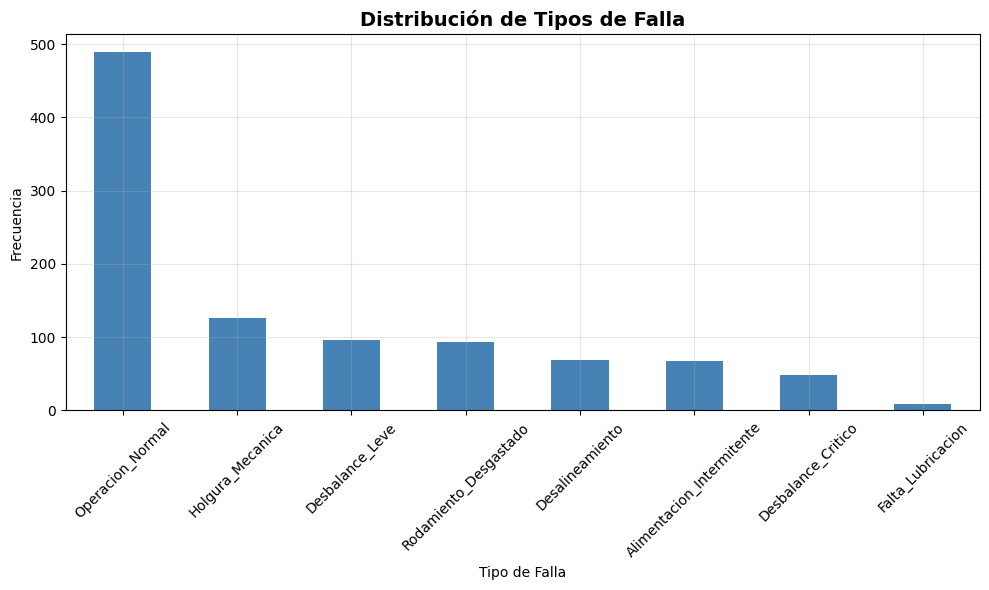

<Figure size 1200x600 with 0 Axes>

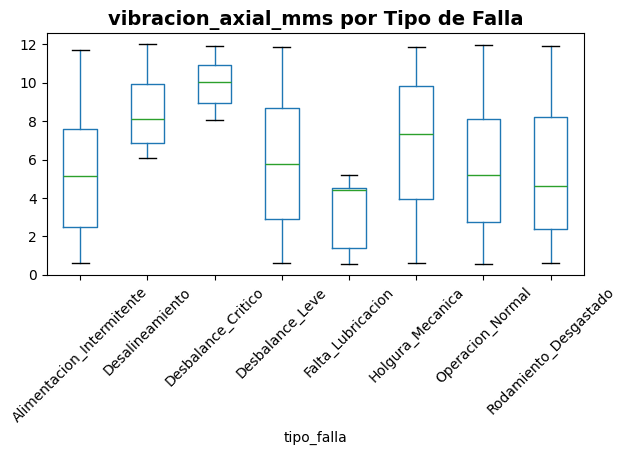

<Figure size 1200x600 with 0 Axes>

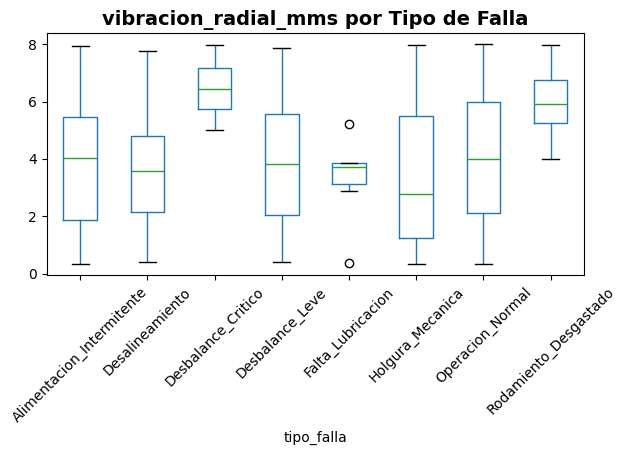

<Figure size 1200x600 with 0 Axes>

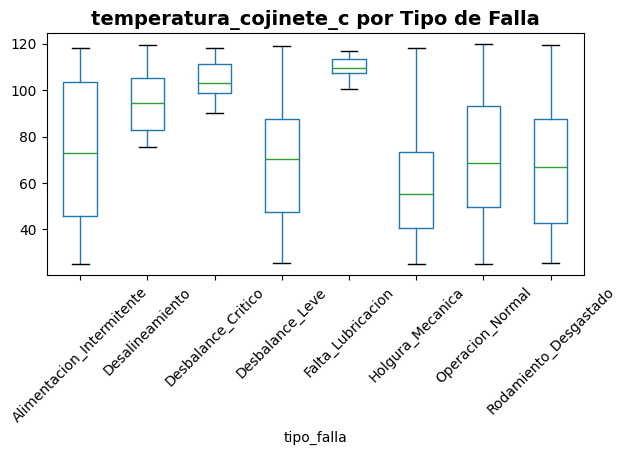

<Figure size 1200x600 with 0 Axes>

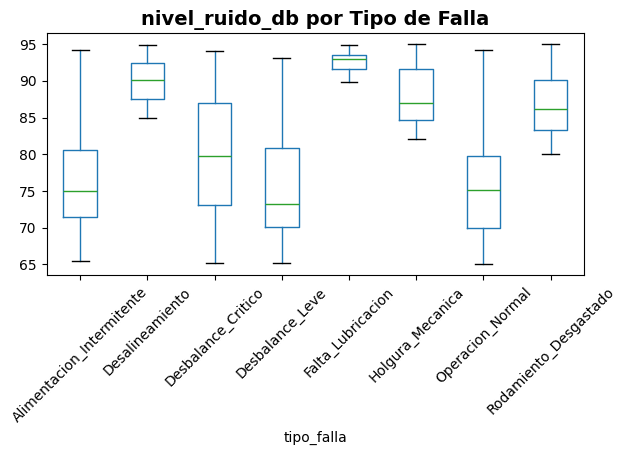

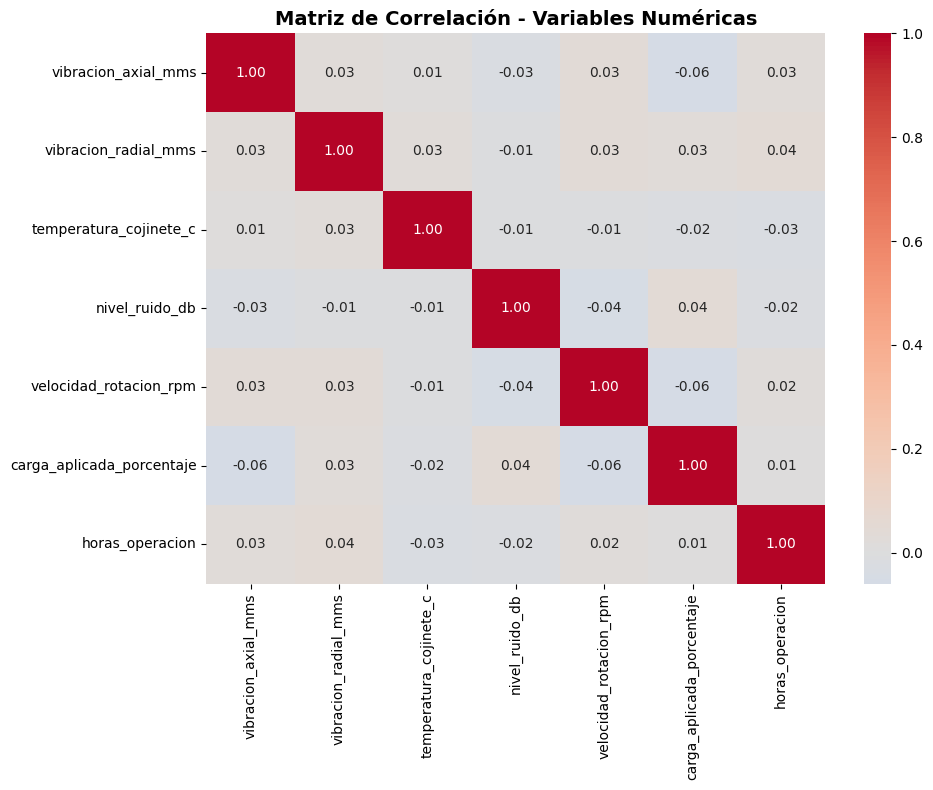

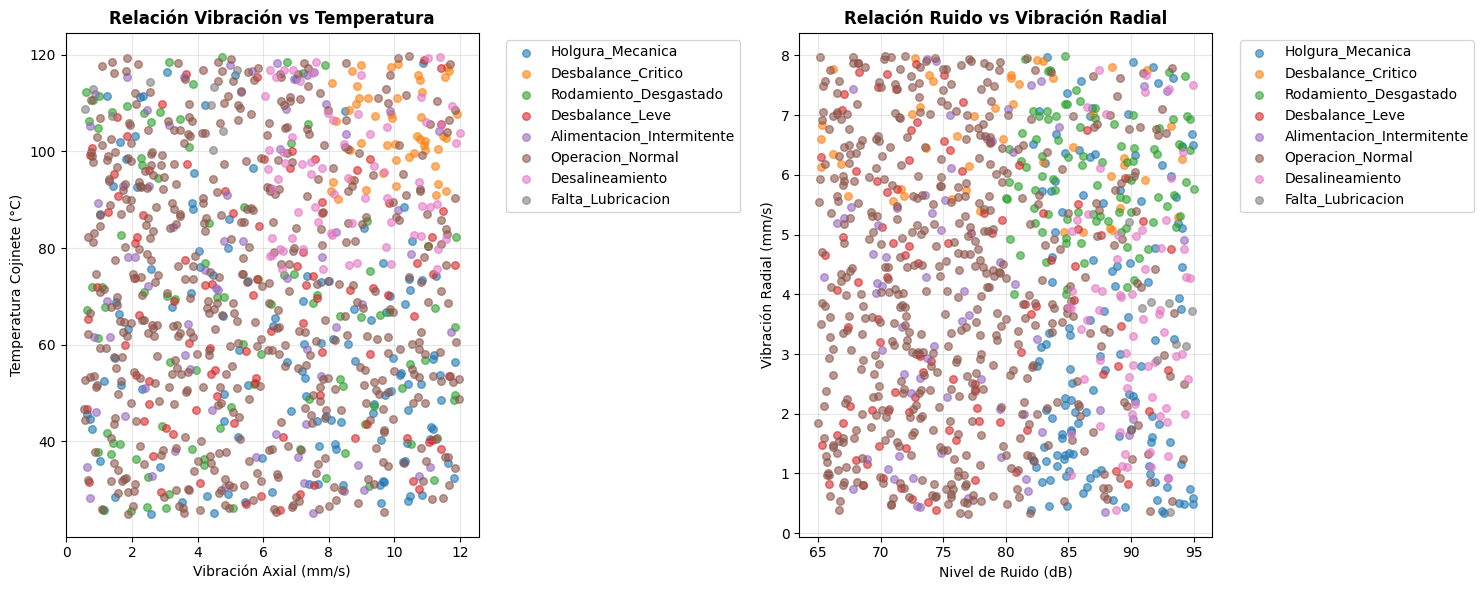


DIVISIÓN DE DATOS:
Entrenamiento: 750 muestras
Prueba: 250 muestras
Número de clases: 8

MODELO DE ÁRBOL DE DECISIÓN

IMPORTANCIA DE CARACTERÍSTICAS:
           Característica  Importancia
      vibracion_axial_mms     0.251468
     vibracion_radial_mms     0.215167
   temperatura_cojinete_c     0.208496
           nivel_ruido_db     0.192339
          horas_operacion     0.078324
   velocidad_rotacion_rpm     0.032100
carga_aplicada_porcentaje     0.022106

MÉTRICAS DE EVALUACIÓN:
Exactitud (Accuracy): 0.4120
Validación Cruzada (5-fold): 0.4560 (+/- 0.1359)


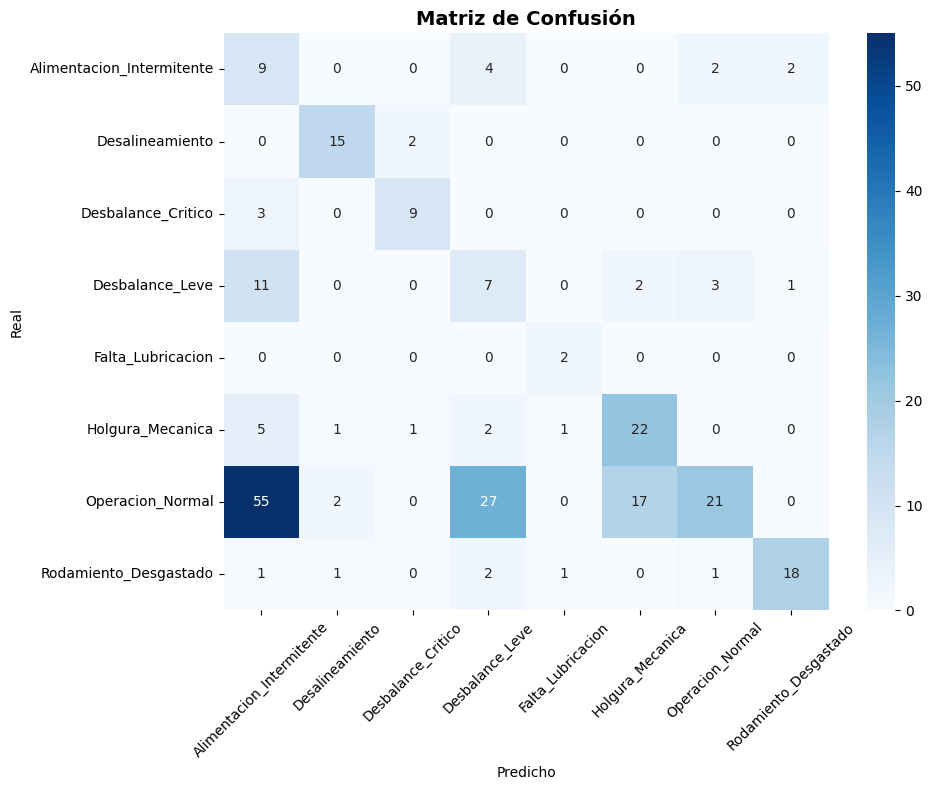


REPORTE DE CLASIFICACIÓN:
                           precision    recall  f1-score   support

Alimentacion_Intermitente       0.11      0.53      0.18        17
          Desalineamiento       0.79      0.88      0.83        17
       Desbalance_Critico       0.75      0.75      0.75        12
          Desbalance_Leve       0.17      0.29      0.21        24
        Falta_Lubricacion       0.50      1.00      0.67         2
         Holgura_Mecanica       0.54      0.69      0.60        32
         Operacion_Normal       0.78      0.17      0.28       122
    Rodamiento_Desgastado       0.86      0.75      0.80        24

                 accuracy                           0.41       250
                macro avg       0.56      0.63      0.54       250
             weighted avg       0.65      0.41      0.42       250



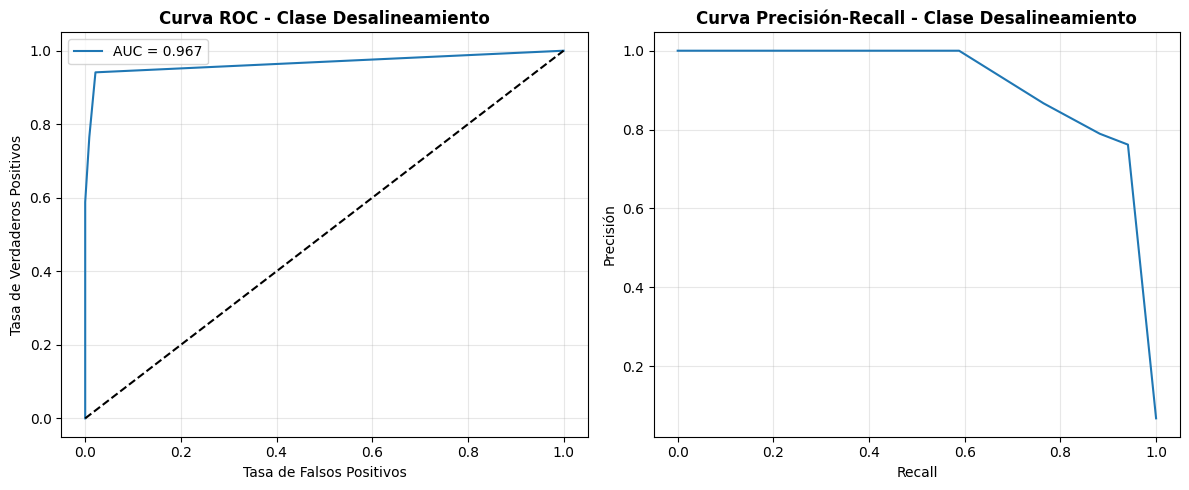

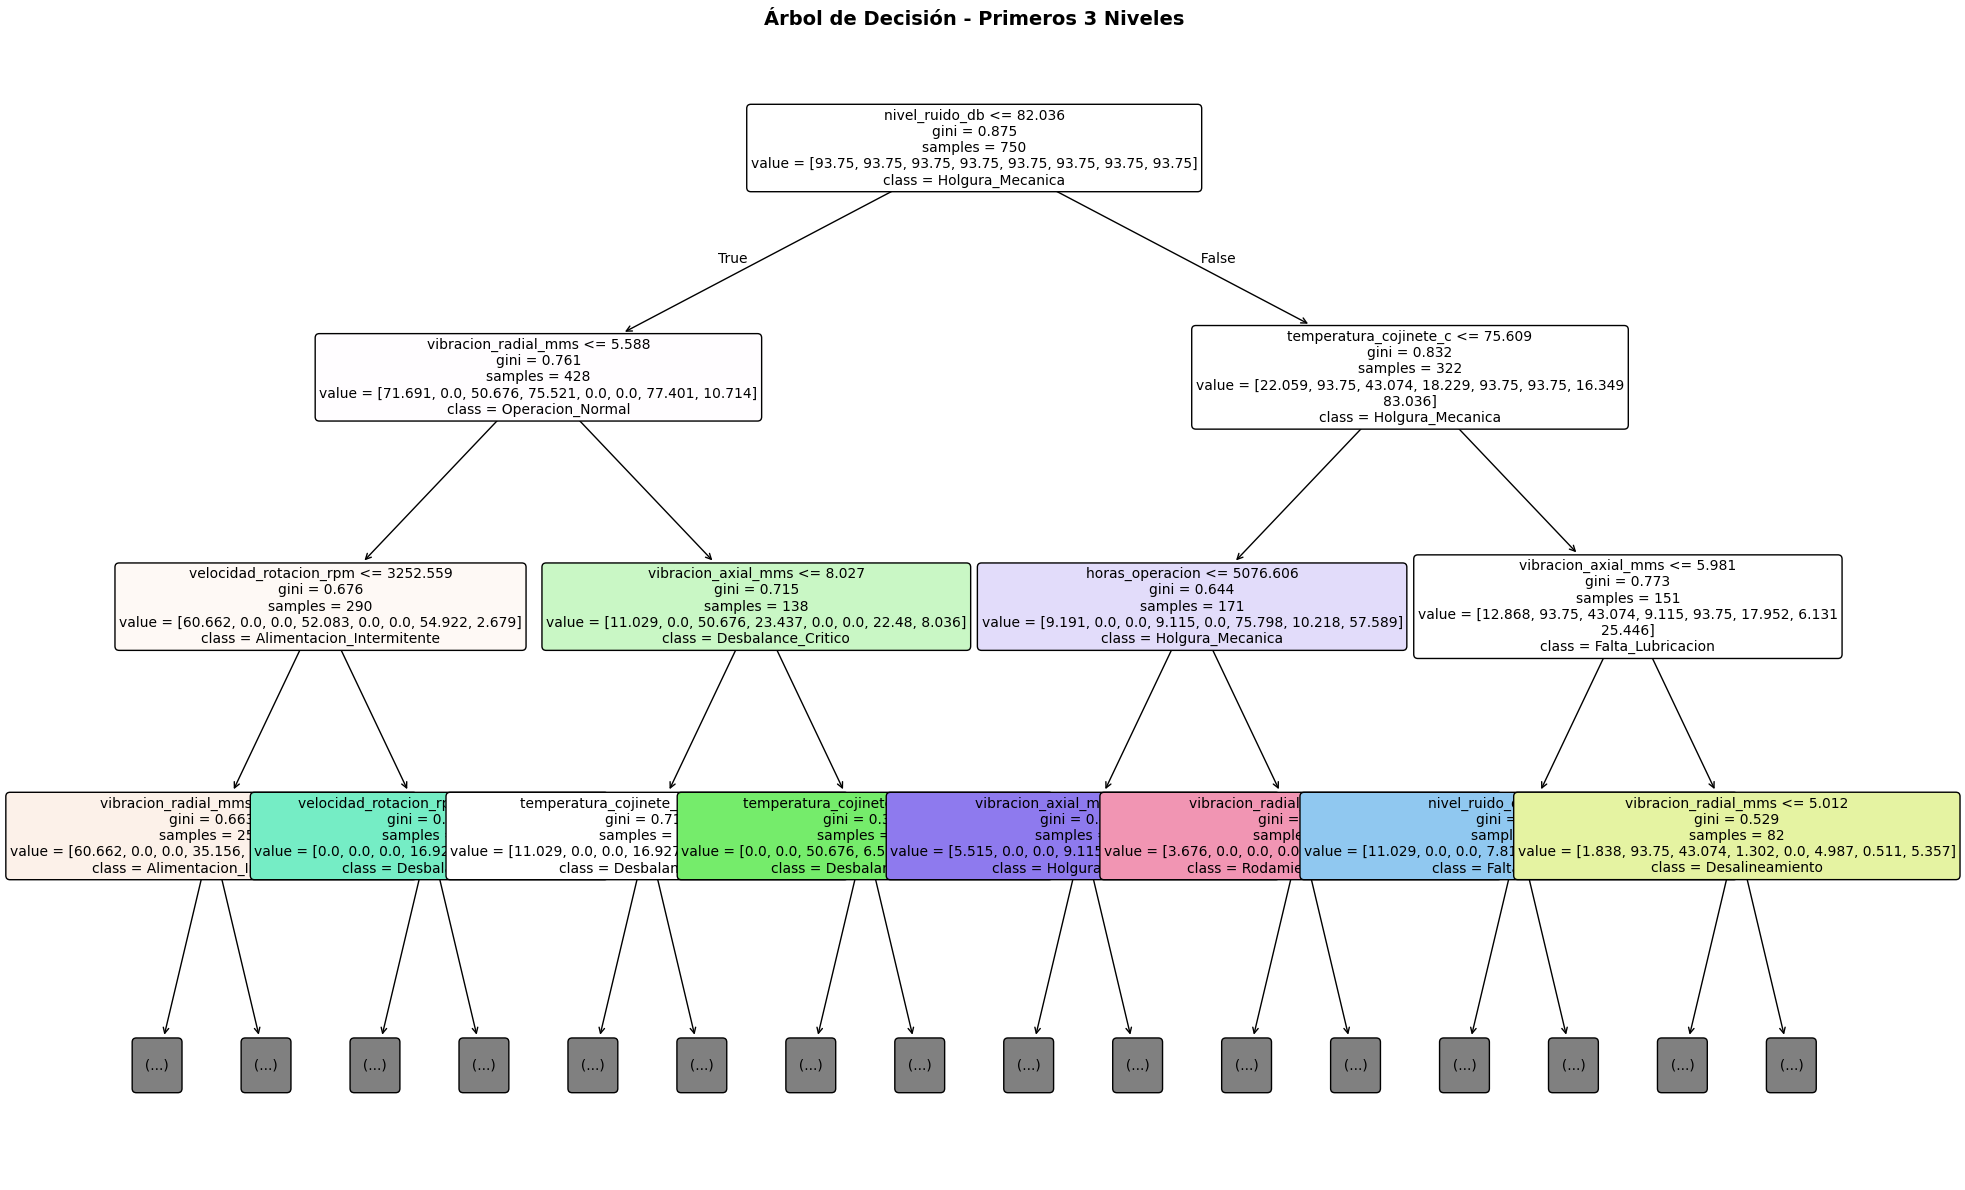


REGLAS DE DECISIÓN IMPORTANTES:
|--- nivel_ruido_db <= 82.04
|   |--- vibracion_radial_mms <= 5.59
|   |   |--- velocidad_rotacion_rpm <= 3252.56
|   |   |   |--- vibracion_radial_mms <= 5.01
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- vibracion_radial_mms >  5.01
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- velocidad_rotacion_rpm >  3252.56
|   |   |   |--- velocidad_rotacion_rpm <= 3356.88
|   |   |   |   |--- class: 3
|   |   |   |--- velocidad_rotacion_rpm >  3356.88
|   |   |   |   |--- truncated branch of depth 2
|   |--- vibracion_radial_mms >  5.59
|   |   |--- vibracion_axial_mms <= 8.03
|   |   |   |--- temperatura_cojinete_c <= 112.33
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- temperatura_cojinete_c >  112.33
|   |   |   |   |--- class: 0
|   |   |--- vibracion_axial_mms >  8.03
|   |   |   |--- temperatura_cojinete_c <= 89.71
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- temperatura_cojinete_

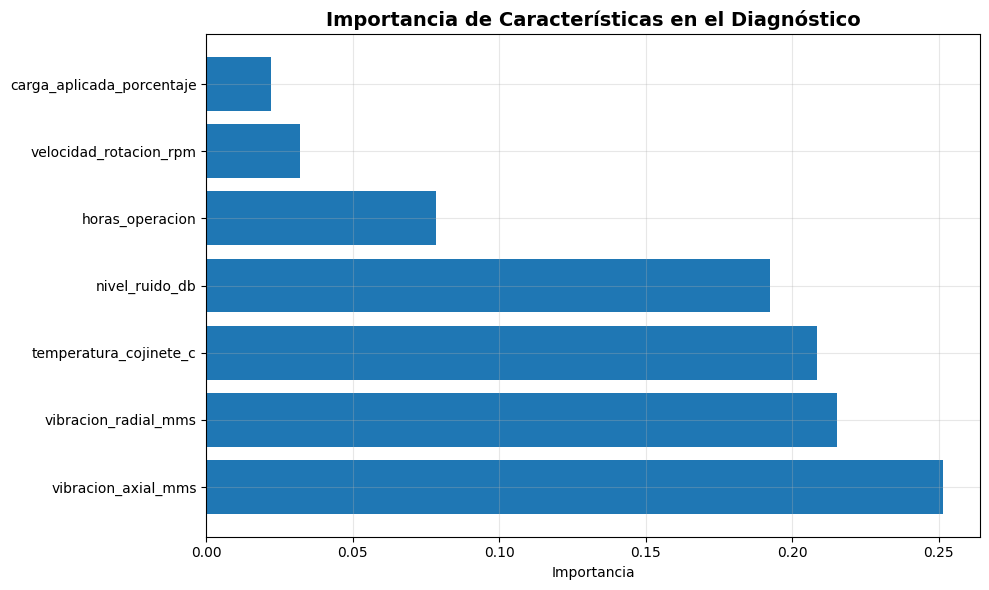

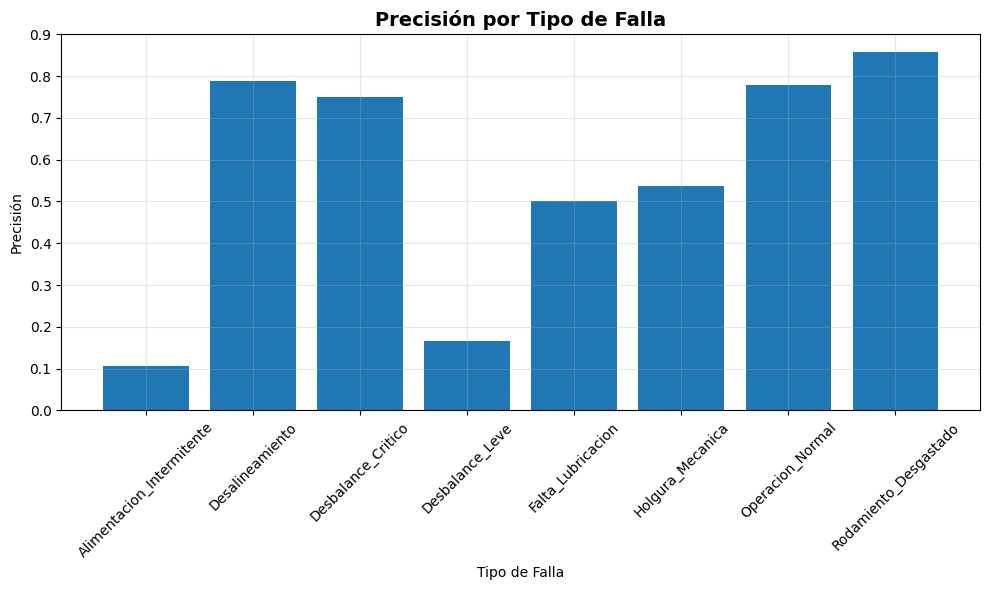

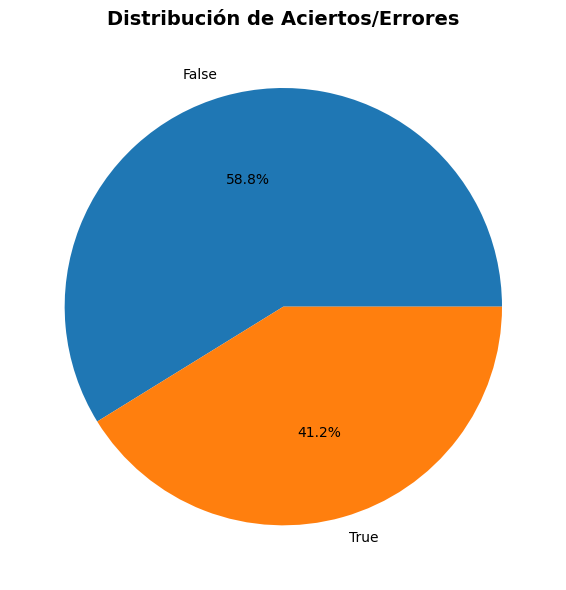


SISTEMA DE DIAGNÓSTICO AUTOMATIZADO

DIAGNÓSTICOS AUTOMÁTICOS:

Caso 1:
  Diagnóstico: Desbalance_Critico
  Confianza: 69.3%
  Parámetros críticos:
    - Vibración axial: 9.5 mm/s
    - Temperatura: 95.0°C
    - Ruido: 90.0 dB

Caso 2:
  Diagnóstico: Alimentacion_Intermitente
  Confianza: 33.6%
  Parámetros críticos:
    - Vibración axial: 3.2 mm/s
    - Temperatura: 65.0°C
    - Ruido: 75.0 dB

Caso 3:
  Diagnóstico: Desalineamiento
  Confianza: 53.3%
  Parámetros críticos:
    - Vibración axial: 7.1 mm/s
    - Temperatura: 82.0°C
    - Ruido: 85.0 dB

Caso 4:
  Diagnóstico: Alimentacion_Intermitente
  Confianza: 33.6%
  Parámetros críticos:
    - Vibración axial: 1.8 mm/s
    - Temperatura: 45.0°C
    - Ruido: 70.0 dB

Caso 5:
  Diagnóstico: Alimentacion_Intermitente
  Confianza: 33.6%
  Parámetros críticos:
    - Vibración axial: 5.5 mm/s
    - Temperatura: 78.0°C
    - Ruido: 82.0 dB

INTERPRETACIÓN TÉCNICA PARA INGENIERÍA MECÁNICA

PATRONES DE FALLA IDENTIFICADOS:
1. DESBALANCE C

In [4]:
# PASO 1: Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           precision_recall_fscore_support)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text

# Configuración para gráficos limpios
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.autolayout'] = True

np.random.seed(42)
plt.style.use('default')
print("PROYECTO 5: DIAGNÓSTICO DE FALLAS EN TRANSMISIONES MECÁNICAS")
print("="*65)

# PASO 2: Generación del dataset de ingeniería mecánica (1000 puntos)
n_samples = 1000

# Variables de monitoreo de transmisión mecánica
vibracion_axial = np.random.uniform(0.5, 12.0, n_samples)  # mm/s
vibracion_radial = np.random.uniform(0.3, 8.0, n_samples)  # mm/s
temperatura_cojinete = np.random.uniform(25, 120, n_samples)  # °C
nivel_ruido = np.random.uniform(65, 95, n_samples)  # dB
velocidad_rotacion = np.random.uniform(800, 3600, n_samples)  # RPM
carga_aplicada = np.random.uniform(20, 100, n_samples)  # %
horas_operacion = np.random.uniform(0, 10000, n_samples)  # horas

# Generar tipos de falla basados en patrones de ingeniería
defectos = []

for i in range(n_samples):
    vib_axial = vibracion_axial[i]
    vib_radial = vibracion_radial[i]
    temp = temperatura_cojinete[i]
    ruido = nivel_ruido[i]
    velocidad = velocidad_rotacion[i]
    carga = carga_aplicada[i]
    horas = horas_operacion[i]

    # Patrones de falla específicos
    if vib_axial > 8.0 and vib_radial > 5.0 and temp > 90:
        defecto = "Desbalance_Critico"
    elif vib_axial > 6.0 and ruido > 85 and temp > 75:
        defecto = "Desalineamiento"
    elif vib_radial > 4.0 and ruido > 80 and horas > 5000:
        defecto = "Rodamiento_Desgastado"
    elif abs(vib_axial - vib_radial) > 3.0 and ruido > 82:
        defecto = "Holgura_Mecanica"
    elif temp > 100 and ruido > 88:
        defecto = "Falta_Lubricacion"
    elif vib_axial < 2.0 and vib_radial < 1.5 and temp < 50:
        defecto = "Operacion_Normal"
    else:
        # Casos intermedios con probabilidades
        rand_val = np.random.random()
        if rand_val < 0.15:
            defecto = "Desbalance_Leve"
        elif rand_val < 0.25:
            defecto = "Alimentacion_Intermitente"
        else:
            defecto = "Operacion_Normal"

    defectos.append(defecto)

# Crear DataFrame
data = pd.DataFrame({
    'vibracion_axial_mms': vibracion_axial,
    'vibracion_radial_mms': vibracion_radial,
    'temperatura_cojinete_c': temperatura_cojinete,
    'nivel_ruido_db': nivel_ruido,
    'velocidad_rotacion_rpm': velocidad_rotacion,
    'carga_aplicada_porcentaje': carga_aplicada,
    'horas_operacion': horas_operacion,
    'tipo_falla': defectos
})

print(f"Dataset generado: {data.shape[0]} registros de transmisiones mecánicas")
print("\nDistribución de tipos de falla:")
print(data['tipo_falla'].value_counts())

# PASO 3: Análisis exploratorio de datos - GRÁFICOS SEPARADOS
print("\n" + "="*65)
print("ANÁLISIS EXPLORATORIO DE DATOS")
print("="*65)

print("\nEstadísticas descriptivas:")
print(data.describe())

# GRÁFICO 1: Distribución de fallas
plt.figure(figsize=(10, 6))
data['tipo_falla'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribución de Tipos de Falla', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Falla')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# GRÁFICO 2: Boxplots por tipo de falla (en figuras separadas)
variables = ['vibracion_axial_mms', 'vibracion_radial_mms', 'temperatura_cojinete_c', 'nivel_ruido_db']

for var in variables:
    plt.figure(figsize=(12, 6))
    data.boxplot(column=var, by='tipo_falla', grid=False)
    plt.title(f'{var} por Tipo de Falla', fontsize=14, fontweight='bold')
    plt.suptitle('')  # Eliminar título automático
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# GRÁFICO 3: Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# GRÁFICO 4: Scatter plots de relaciones clave
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Primer scatter plot
for falla in data['tipo_falla'].unique():
    subset = data[data['tipo_falla'] == falla]
    ax1.scatter(subset['vibracion_axial_mms'], subset['temperatura_cojinete_c'],
               alpha=0.6, label=falla, s=30)
ax1.set_xlabel('Vibración Axial (mm/s)')
ax1.set_ylabel('Temperatura Cojinete (°C)')
ax1.set_title('Relación Vibración vs Temperatura', fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Segundo scatter plot
for falla in data['tipo_falla'].unique():
    subset = data[data['tipo_falla'] == falla]
    ax2.scatter(subset['nivel_ruido_db'], subset['vibracion_radial_mms'],
               alpha=0.6, label=falla, s=30)
ax2.set_xlabel('Nivel de Ruido (dB)')
ax2.set_ylabel('Vibración Radial (mm/s)')
ax2.set_title('Relación Ruido vs Vibración Radial', fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 4: Preparación de datos para el modelo
# Codificar la variable objetivo
le = LabelEncoder()
data['tipo_falla_encoded'] = le.fit_transform(data['tipo_falla'])

# Características y variable objetivo
X = data[['vibracion_axial_mms', 'vibracion_radial_mms', 'temperatura_cojinete_c',
          'nivel_ruido_db', 'velocidad_rotacion_rpm', 'carga_aplicada_porcentaje',
          'horas_operacion']]
y = data['tipo_falla_encoded']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nDIVISIÓN DE DATOS:")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Número de clases: {len(le.classes_)}")

# PASO 5: Entrenamiento del árbol de decisión
modelo_arbol = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    class_weight='balanced'
)

modelo_arbol.fit(X_train, y_train)

print("\n" + "="*65)
print("MODELO DE ÁRBOL DE DECISIÓN")
print("="*65)

# Importancia de características
importancias = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nIMPORTANCIA DE CARACTERÍSTICAS:")
print(importancias.to_string(index=False))

# PASO 6: Evaluación del modelo
y_pred = modelo_arbol.predict(X_test)
y_pred_proba = modelo_arbol.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(modelo_arbol, X_train, y_train, cv=5, scoring='accuracy')

print(f"\nMÉTRICAS DE EVALUACIÓN:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Validación Cruzada (5-fold): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# GRÁFICO 5: Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Reporte de clasificación
print("\nREPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# GRÁFICO 6: Curvas ROC para una clase específica (clase 1 como ejemplo)
plt.figure(figsize=(12, 5))

# Para problemas multiclase, mostramos la curva ROC para una clase específica
clase_ejemplo = 1  # Podemos cambiar este índice según las clases disponibles
if len(le.classes_) > clase_ejemplo:
    y_test_bin = (y_test == clase_ejemplo).astype(int)
    y_pred_proba_bin = y_pred_proba[:, clase_ejemplo]

    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba_bin)
    auc_roc = roc_auc_score(y_test_bin, y_pred_proba_bin)

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - Clase {le.classes_[clase_ejemplo]}', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_proba_bin)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precisión')
    plt.title(f'Curva Precisión-Recall - Clase {le.classes_[clase_ejemplo]}', fontweight='bold')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# PASO 7: Visualización del árbol de decisión
plt.figure(figsize=(20, 12))
plot_tree(modelo_arbol,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Mostrar solo primeros 3 niveles para claridad
plt.title('Árbol de Decisión - Primeros 3 Niveles', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Reglas de decisión importantes
print("\nREGLAS DE DECISIÓN IMPORTANTES:")
tree_rules = export_text(modelo_arbol, feature_names=list(X.columns), max_depth=3)
print(tree_rules)

# PASO 8: Análisis de casos de diagnóstico - GRÁFICOS SEPARADOS
# GRÁFICO 7: Importancia de características
plt.figure(figsize=(10, 6))
plt.barh(importancias['Característica'], importancias['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de Características en el Diagnóstico', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# GRÁFICO 8: Precisión por clase
plt.figure(figsize=(10, 6))
precision_por_clase = precision_recall_fscore_support(y_test, y_pred, average=None)[0]
plt.bar(range(len(le.classes_)), precision_por_clase)
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45)
plt.xlabel('Tipo de Falla')
plt.ylabel('Precisión')
plt.title('Precisión por Tipo de Falla', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# GRÁFICO 9: Distribución de aciertos/errores
plt.figure(figsize=(8, 6))
errores = y_test != y_pred
data_errores = data.iloc[X_test.index].copy()
data_errores['acertado'] = ~errores
data_errores['acertado'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Aciertos/Errores', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

# PASO 9: Sistema de diagnóstico automatizado
print("\n" + "="*65)
print("SISTEMA DE DIAGNÓSTICO AUTOMATIZADO")
print("="*65)

# Casos de prueba para diagnóstico
casos_diagnostico = pd.DataFrame({
    'vibracion_axial_mms': [9.5, 3.2, 7.1, 1.8, 5.5],
    'vibracion_radial_mms': [6.8, 2.1, 3.5, 1.2, 4.2],
    'temperatura_cojinete_c': [95.0, 65.0, 82.0, 45.0, 78.0],
    'nivel_ruido_db': [90.0, 75.0, 85.0, 70.0, 82.0],
    'velocidad_rotacion_rpm': [2800, 1500, 2200, 1200, 2000],
    'carga_aplicada_porcentaje': [85.0, 45.0, 70.0, 30.0, 65.0],
    'horas_operacion': [7500, 2000, 6000, 1000, 4500]
})

diagnosticos = modelo_arbol.predict(casos_diagnostico)
probabilidades = modelo_arbol.predict_proba(casos_diagnostico)

print("\nDIAGNÓSTICOS AUTOMÁTICOS:")
for i, (diagnostico, prob) in enumerate(zip(diagnosticos, probabilidades)):
    falla_predicha = le.inverse_transform([diagnostico])[0]
    confianza = prob[diagnostico]

    print(f"\nCaso {i+1}:")
    print(f"  Diagnóstico: {falla_predicha}")
    print(f"  Confianza: {confianza:.1%}")
    print(f"  Parámetros críticos:")
    print(f"    - Vibración axial: {casos_diagnostico.iloc[i]['vibracion_axial_mms']} mm/s")
    print(f"    - Temperatura: {casos_diagnostico.iloc[i]['temperatura_cojinete_c']}°C")
    print(f"    - Ruido: {casos_diagnostico.iloc[i]['nivel_ruido_db']} dB")

# PASO 10: Interpretación para ingeniería mecánica
print("\n" + "="*65)
print("INTERPRETACIÓN TÉCNICA PARA INGENIERÍA MECÁNICA")
print("="*65)

print("\nPATRONES DE FALLA IDENTIFICADOS:")
print("1. DESBALANCE CRÍTICO:")
print("   • Vibración axial > 8.0 mm/s")
print("   • Vibración radial > 5.0 mm/s")
print("   • Temperatura > 90°C")

print("\n2. DESALINEAMIENTO:")
print("   • Vibración axial > 6.0 mm/s")
print("   • Ruido > 85 dB")
print("   • Temperatura > 75°C")

print("\n3. RODAMIENTO DESGASTADO:")
print("   • Vibración radial > 4.0 mm/s")
print("   • Ruido > 80 dB")
print("   • Horas operación > 5000")

print("\n4. HOLGURA MECÁNICA:")
print("   • Diferencia vibración axial-radial > 3.0 mm/s")
print("   • Ruido > 82 dB")

print("\n5. FALTA DE LUBRICACIÓN:")
print("   • Temperatura > 100°C")
print("   • Ruido > 88 dB")

# PASO 11: Recomendaciones de mantenimiento
print("\n" + "="*65)
print("RECOMENDACIONES DE MANTENIMIENTO PREDICTIVO")
print("="*65)

print("\nACCIONES RECOMENDADAS POR TIPO DE FALLA:")
recomendaciones = {
    'Desbalance_Critico': 'Balanceo dinámico urgente y verificación de masas',
    'Desalineamiento': 'Realinear ejes y verificar acoplamientos',
    'Rodamiento_Desgastado': 'Reemplazar rodamiento y verificar lubricación',
    'Holgura_Mecanica': 'Ajustar holguras y verificar fijaciones',
    'Falta_Lubricacion': 'Lubricar inmediatamente y verificar sistema de lubricación',
    'Desbalance_Leve': 'Programar balanceo en próximo mantenimiento',
    'Alimentacion_Intermitente': 'Verificar sistema eléctrico y conexiones',
    'Operacion_Normal': 'Continuar monitoreo rutinario'
}

for falla, accion in recomendaciones.items():
    if falla in le.classes_:
        print(f"• {falla}: {accion}")

# PASO 12: Validación de estabilidad del modelo
print("\n" + "="*65)
print("VALIDACIÓN DEL MODELO")
print("="*65)

print(f"\nESTABILIDAD DEL MODELO:")
print(f"• Exactitud en prueba: {accuracy:.3f}")
print(f"• Consistencia validación cruzada: {cv_scores.std():.3f}")
print(f"• Características más importantes: {importancias['Característica'].iloc[0]} ({importancias['Importancia'].iloc[0]:.3f})")

if cv_scores.std() < 0.05 and accuracy > 0.85:
    print("✓ Modelo estable y confiable para diagnóstico")
else:
    print("⚠ Modelo puede requerir ajustes adicionales")

print(f"\nCAPACIDAD DE DIAGNÓSTICO:")
print(f"• Tipos de falla cubiertos: {len(le.classes_)}")
print(f"• Parámetros monitoreados: {X.shape[1]} variables")
print(f"• Tamaño dataset de entrenamiento: {X_train.shape[0]} muestras")

print("\nIMPLEMENTACIÓN RECOMENDADA:")
print("• Sistema de monitoreo continuo en tiempo real")
print("• Alertas automáticas por tipo de falla")
print("• Integración con sistema de mantenimiento")
print("• Actualización periódica del modelo con nuevos datos")